<p><h2>特徴量の説明</h2>
＊黄色い部分が目的変数<br>
<h3>シリンダー</h3>
　シリンダーはエンジンの重要な部品であり、室内で燃料が燃焼して動力を生成する。 シリンダーはピストンと、上部にある XNUMX つのバルブ (XNUMX は吸気用、もう XNUMX は排気用) で構成されている。 ピストンが上下し、その往復運動によって発生する力が車両を駆動する。<br>
　気筒数が増えると高回転時の出力が上がり、最高速度が高くなる。反面、低速での加速性能は悪くなり、燃費効率も落ちる。<br>
4 気筒エンジンは通常、6気筒または 8気筒エンジンよりも出力が低くなる。<br><br>
<h3>燃費</h3>
　燃費測定は実際にクルマを走らせるわけではなく、試験場のシャシダイナモメータ（測定器のローラー）にクルマを載せ、車両重量ごとに負荷荷重を変化させた上で、その場でタイヤを回転させ、一定のパターンで、燃費を測定している(モード燃費)。

<h3>起源</h3>
1=アメリカ, 2=ヨーロッパ, 3=日本
<h3>排気量</h3>
　実質的に燃費絵の影響が最も大きいと考えられる。
　エンジンの総排気量は「シリンダー内径面積×ピストン行程×気筒数」の計算で求められる。<br><br>
<h3>馬力</h3>
　馬力とはエンジンが発揮できる出力の単位で、1馬力は重量75kgの物体を1秒間に1m持ち上げる力に相当する。<br>
　排気量が大きいほどより大きな軸トルクを発揮できるため、より優れた加速力や登坂力を発揮する。排気量が少ないと少量の燃料で移動できるため環境に優しく、燃費性能に優れる。<br>
　走行距離で見たときには低排気量の方が優位に立つのかも。<br><br>
<h3>加速度</h3>
　シリンダーの気筒数が多く、排気量が多い車ほど加速度性能は上がる。<br>
　加減速が多い運転をすると燃費が悪くなる。同じ程度の加減速の場合、気筒数が大きい車の方が燃費が悪くなると考えられる。<br><br>
<h3>重量</h3>
　F=maより重さが増えると、発進にも大きな加速が必要になり、より大きな力＝大きなパワーが必要になる。したがって重量の大きい車はパワーを出すのにより多くの燃料が必要なことから、結果的に走行燃費が悪いということにつながる。大きな車には加速度性能が良い気筒数が多いシリンダーを持つエンジンが適している。<br>




</p>




In [6]:
#ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


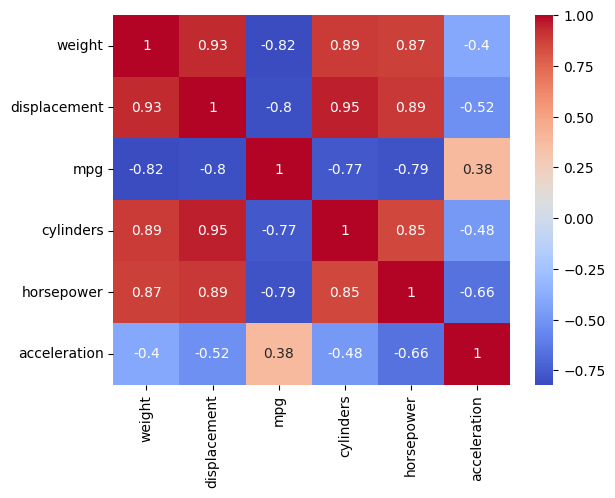

In [7]:
df_train = pd.read_csv('データ/train.tsv' , sep = '\t')
#カラム名を日本語に変更
#df_train = df_train.rename(columns = {'mpg':'燃費' , 'cylinders':'シリンダー' , 'displacement':'排気量' , 'horsepower':'馬力' , 'weight':'重量' , 'acceleration':'加速度' , 'model year':'製造年代' , 'origin':'原産国' , 'car name':'車種'})
df_train['horsepower'] = df_train['horsepower'].replace({'?':np.nan}).astype(float)

df_train.isnull().sum()
df_train.dropna()
df_train.head()
df_train[['weight'  , 'displacement' , 'mpg' , 'cylinders' , 'horsepower']].corr()
sns.heatmap(df_train[['weight'  , 'displacement' , 'mpg' , 'cylinders' , 'horsepower' , 'acceleration']].corr() , cmap='coolwarm' , annot=True)
plt.show()

In [8]:

df_train['horsepower'] = df_train['horsepower'].replace({'?':np.nan}).astype(float)

df_train.isnull().sum()
df_train.dropna()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.0,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.0,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.0,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.0,2050.0,17.3,81,3,toyota tercel
...,...,...,...,...,...,...,...,...,...,...
194,384,40.8,4,85.0,65.0,2110.0,19.2,80,3,datsun 210
195,385,20.2,8,302.0,139.0,3570.0,12.8,78,1,mercury monarch ghia
196,387,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
197,395,43.4,4,90.0,48.0,2335.0,23.7,80,2,vw dasher (diesel)


In [9]:
#車種の確認
df_train['car name'].value_counts()
df_train.sort_values(by = 'car name')['car name'].values
['amc' , 'audi' , 'bmw' , 'buick century' , 'chevroelt' , 'chevy' , 'datsun' , 'dodge' , 'fiat' , 'ford' , 'hi' , 'honda' , 'mazda' , 'mercedes-ben' , 'mercury' , 'oldsmobile' , 'opel' , 'peugeot' , 'plymouth' , 'pontiac' , 'renault' , 'saab' , 'subaru' , 'toyota' , 'triumph' , 'vokswagen' , 'volvo' , 'vw']


['amc',
 'audi',
 'bmw',
 'buick century',
 'chevroelt',
 'chevy',
 'datsun',
 'dodge',
 'fiat',
 'ford',
 'hi',
 'honda',
 'mazda',
 'mercedes-ben',
 'mercury',
 'oldsmobile',
 'opel',
 'peugeot',
 'plymouth',
 'pontiac',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'triumph',
 'vokswagen',
 'volvo',
 'vw']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mpg                   199 non-null    float64
 1   displacement          199 non-null    float64
 2   model year            199 non-null    int64  
 3   origin                199 non-null    int64  
 4   manufacturers number  199 non-null    int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 7.1 KB


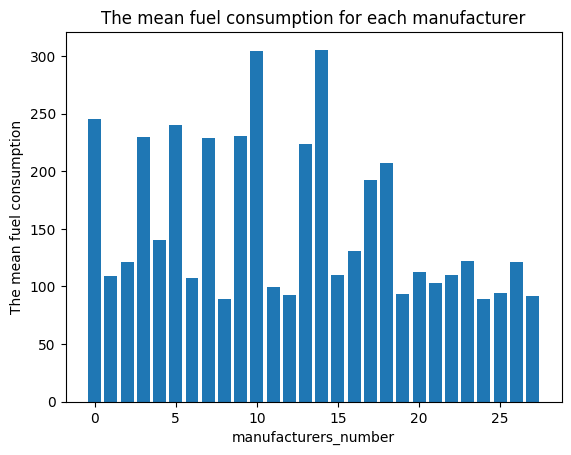

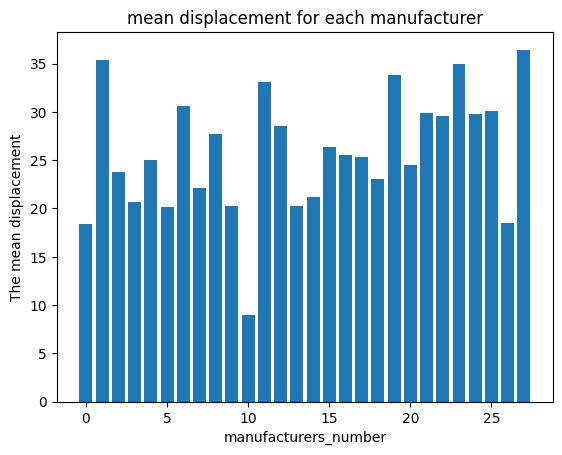

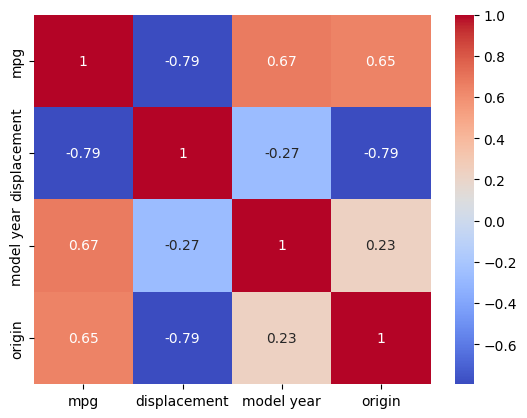

In [10]:
#メーカーごとの分類
#df_train['horsepower'] = df_train['horsepower'].replace({'?':np.nan}).astype(float)

#df_train.isnull().sum()
#df_train.dropna()

df_split = df_train['car name'].str.split(expand = True)#str.split('')で文字列を''で分割(入力しないと空白で分割される)
df_train['manufacturers name'] = df_split.iloc[:, 0]
#エンコード
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
df_train['manufacturers number'] = pd.DataFrame(lencoder.fit_transform(df_train['manufacturers name'].str[:4]))
df_train_drop = df_train.drop(['car name' , 'id' , 'cylinders' , 'manufacturers name' , 'weight' , 'horsepower' , 'acceleration'] , axis = 1)
#メーカーごとの排気量の平均値
#groupbyするとキーに使ったカラムはindexとなる
df_train_drop.info()
df_ave_per_manufacturers = df_train_drop.groupby('manufacturers number').mean()
plt.bar(df_ave_per_manufacturers.index , df_ave_per_manufacturers['displacement'])
plt.xlabel('manufacturers_number')
plt.title('The mean fuel consumption for each manufacturer')
plt.ylabel('The mean fuel consumption')
plt.show()
plt.bar(df_ave_per_manufacturers.index , df_ave_per_manufacturers['mpg'])
plt.xlabel('manufacturers_number')
plt.ylabel('The mean displacement')
plt.title('mean displacement for each manufacturer')
plt.show()
#manufacturers_name = ['amc' , 'audi' , 'bmw' , 'buick century' , 'chevroelt' , 'chevy' , 'datsun' , 'dodge' , 'fiat' , 'ford' , 'hi' , 'honda' , 'mazda' , 'mercedes-ben' , 'mercury' , 'oldsmobile' , 'opel' , 'peugeot' , 'plymouth' , 'pontiac' , 'renault' , 'saab' , 'subaru' , 'toyota' , 'triumph' , 'vokswagen' , 'volvo' , 'vw']

#sns.heatmapでヒートマップを作製
#ヒートマップ上に数値を表示する場合はannot=Trueとする。
sns.heatmap(df_ave_per_manufacturers.corr() , cmap='coolwarm' , annot=True)
plt.show()

              mpg  displacement  model year  manufacturers number
origin                                                           
1       20.866393    232.491803   75.893443              7.696721
2       29.076316    105.026316   75.947368             18.289474
3       30.423077    105.743590   77.230769             13.743590


C:\Users\shouh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


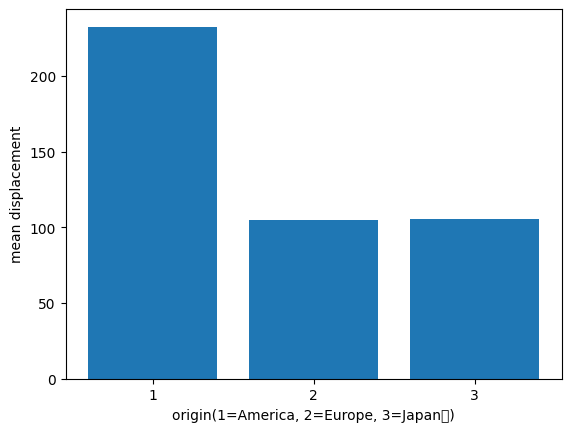

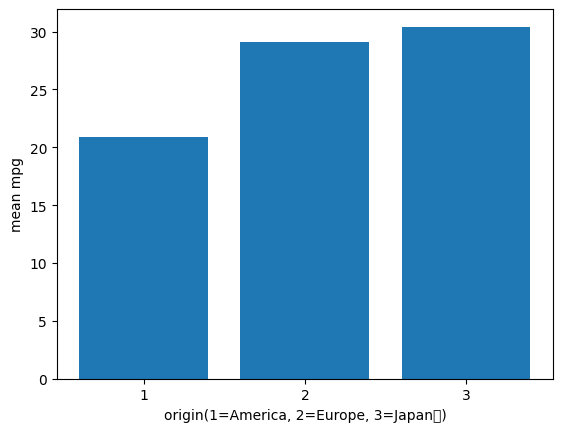

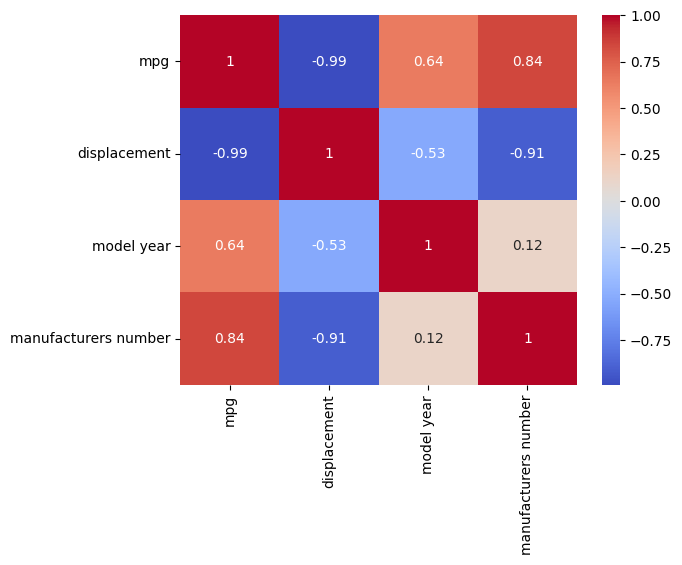

In [11]:
#原産国によるグルーピング
df_origin = df_train_drop.groupby('origin').mean()
print(df_origin)
#排気量
plt.bar(df_origin.index , df_origin['displacement'])
plt.ylabel('mean displacement')
plt.xticks([1 , 2 , 3])
plt.xlabel('origin(1=America, 2=Europe, 3=Japan）)')
plt.show()
#燃費
plt.bar(df_origin.index , df_origin['mpg'])
plt.ylabel('mean mpg')
plt.xticks([1 , 2 , 3])
plt.xlabel('origin(1=America, 2=Europe, 3=Japan）)')
plt.show()
#相関係数のヒートマップ
sns.heatmap(df_origin.corr() , cmap='coolwarm' , annot=True)
plt.show()

<p>
<h3>生産国ごとに分けた際の各特徴量の相関についての結果・考察</h3>
　アメリカ産車の排気量が高く、日本、ヨーロッパ産車は燃費が良い傾向にあることが分かった。排気量アメリカと日本、ヨーロッパの排気量の差が二倍以上あるのに対し、燃費の差は1.5倍ほどであった。
<br>
　排気量と燃費の相関がメーカーごとにグルーピングした時よりも高くなった。
<br>　
　メーカーと燃費の相関が0.84と高かった。
</p>

                  mpg  displacement    origin  manufacturers number
model year                                                         
70          17.714286    281.142857  1.357143              7.928571
71          22.222222    193.500000  1.388889              9.888889
72          19.307692    199.384615  1.692308             14.615385
73          17.266667    243.333333  1.333333              8.733333
74          24.642857    141.357143  2.000000             12.000000


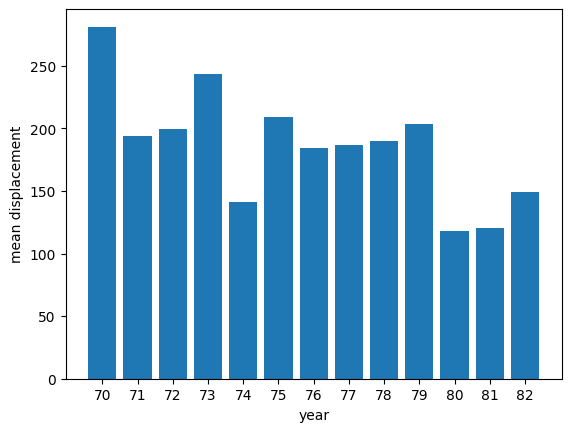

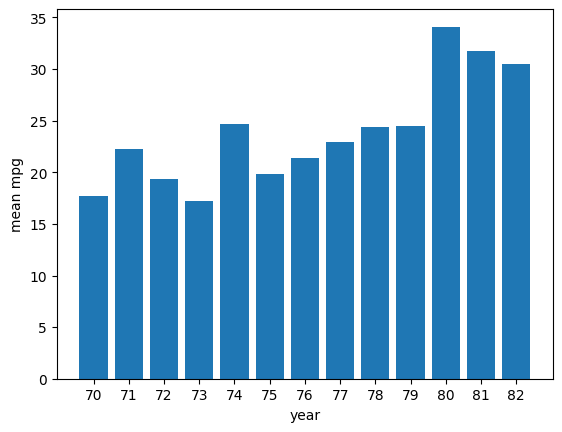

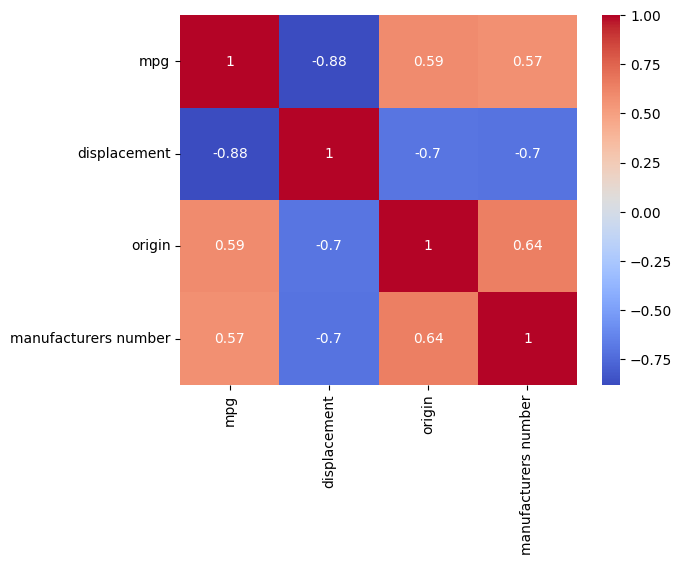

In [12]:
#年代によるグルーピング
#rangeは70-82
df_year = df_train_drop.groupby('model year').mean()
print(df_year.head())
#排気量
plt.bar(df_year.index , df_year['displacement'])
plt.xticks(np.arange(70 , 83 , step =1))#メモリを任意の間隔に指定(start,stop,step)
plt.xlabel('year')
plt.ylabel('mean displacement')
plt.show()
#燃費
plt.bar(df_year.index , df_year['mpg'])
plt.xticks(np.arange(70 , 83 , step =1))#メモリを任意の間隔に指定(start,stop,step)
plt.xlabel('year')
plt.ylabel('mean mpg')
plt.show()
#ヒートマップ
sns.heatmap(df_year.corr() , cmap='coolwarm' , annot=True)
plt.show()

<p>
<h3>生産年代ごとに分けた際の各特徴量の相関についての結果・考察</h3>
　年代を経るごとに排気量が小さくなリ、燃費は向上する傾向が見られた。
<br>
　排気量、生産国、メーカーと燃費の相関が他の特徴量でグルーピングした際よりも低かった。
</p>

<p>
<h3>各特徴量によるグルーピングの考察</h3>
 　それぞれのグルーピングにおいてキーとした特徴量と排気量、燃費においてある程度の傾向が見られた。また生産国でグルーピングしたときに燃費と排気量の相関が最も高くなり、生産年代でグルーピングしたときに最も相関係数が低くなった。<br>
 　
</p>